<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_groupwise_0_1_0_9_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.1_0.9'

In [4]:
os.listdir(base_path)

['data_groupwise_0.1_0.9_n250.csv',
 'data_groupwise_0.1_0.9_n120.csv',
 'data_groupwise_0.1_0.9_n60.csv',
 'data_groupwise_0.1_0.9_n30.csv',
 'data_groupwise_0.1_0.9_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.1_0.9_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,83.559665,65.506796,62.204893,-0.225772,221.045582,221.125480,-0.079898
1,0.0,1.0,85.806527,39.414469,66.290004,-0.178698,201.332302,201.614749,-0.282446
2,0.0,2.0,88.843993,45.470831,60.892483,-0.168521,205.038786,205.245343,-0.206557
3,0.0,3.0,75.172726,54.635387,24.493090,0.201681,164.502884,164.239142,0.263741
4,0.0,4.0,72.742179,76.716244,77.068655,-0.110879,236.416199,236.298896,0.117304
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,56.606926,53.239873,98.797617,1.055957,219.700374,218.805024,0.895350
59996,999.0,56.0,51.729867,58.780604,86.269095,1.314496,208.094061,206.917148,1.176914
59997,999.0,57.0,27.813344,33.913714,22.326228,-0.532340,93.520946,93.854432,-0.333486
59998,999.0,58.0,93.263711,52.411234,41.864984,-0.631754,196.908175,197.217210,-0.309036


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,83.559665,65.506796,62.204893,-0.225772,221.045582,221.125480,-0.079898
1,0.0,1.0,85.806527,39.414469,66.290004,-0.178698,201.332302,201.614749,-0.282446
2,0.0,2.0,88.843993,45.470831,60.892483,-0.168521,205.038786,205.245343,-0.206557
3,0.0,3.0,75.172726,54.635387,24.493090,0.201681,164.502884,164.239142,0.263741
4,0.0,4.0,72.742179,76.716244,77.068655,-0.110879,236.416199,236.298896,0.117304
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,56.606926,53.239873,98.797617,1.055957,219.700374,218.805024,0.895350
59996,999.0,56.0,51.729867,58.780604,86.269095,1.314496,208.094061,206.917148,1.176914
59997,999.0,57.0,27.813344,33.913714,22.326228,-0.532340,93.520946,93.854432,-0.333486
59998,999.0,58.0,93.263711,52.411234,41.864984,-0.631754,196.908175,197.217210,-0.309036


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    83.559665  65.506796  62.204893  ...  221.045582  221.125480 -0.079898
      1.0    85.806527  39.414469  66.290004  ...  201.332302  201.614749 -0.282446
      2.0    88.843993  45.470831  60.892483  ...  205.038786  205.245343 -0.206557
      3.0    75.172726  54.635387  24.493090  ...  164.502884  164.239142  0.263741
      4.0    72.742179  76.716244  77.068655  ...  236.416199  236.298896  0.117304
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   56.606926  53.239873  98.797617  ...  219.700374  218.805024  0.895350
      56.0   51.729867  58.780604  86.269095  ...  208.094061  206.917148  1.176914
      57.0   27.813344  33.913714  22.326228  ...   93.520946   93.854432 -0.333486
      58.0   93.263711  52.411234  41.864984  ...  196.908175  197.217210 -0.309036
      59.0   28.320941  90.209965  55.966704  ...  184.952799  184.706283  0.246516

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    83.559665  65.506796  62.204893  ...  221.045582  221.125480 -0.079898
      1.0    85.806527  39.414469  66.290004  ...  201.332302  201.614749 -0.282446
      2.0    88.843993  45.470831  60.892483  ...  205.038786  205.245343 -0.206557
      3.0    75.172726  54.635387  24.493090  ...  164.502884  164.239142  0.263741
      4.0    72.742179  76.716244  77.068655  ...  236.416199  236.298896  0.117304
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   56.606926  53.239873  98.797617  ...  219.700374  218.805024  0.895350
      56.0   51.729867  58.780604  86.269095  ...  208.094061  206.917148  1.176914
      57.0   27.813344  33.913714  22.326228  ...   93.520946   93.854432 -0.333486
      58.0   93.263711  52.411234  41.864984  ...  196.908175  197.217210 -0.309036
      59.0   28.320941  90.209965  55.966704  ...  184.952799  184.706283  0.246516

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,83.559665,65.506796,62.204893,-0.225772,221.045582,221.125480,-0.079898
1,0.0,1.0,85.806527,39.414469,66.290004,-0.178698,201.332302,201.614749,-0.282446
2,0.0,2.0,88.843993,45.470831,60.892483,-0.168521,205.038786,205.245343,-0.206557
3,0.0,3.0,75.172726,54.635387,24.493090,0.201681,164.502884,164.239142,0.263741
4,0.0,4.0,72.742179,76.716244,77.068655,-0.110879,236.416199,236.298896,0.117304
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,56.606926,53.239873,98.797617,1.055957,219.700374,218.805024,0.895350
59996,999.0,56.0,51.729867,58.780604,86.269095,1.314496,208.094061,206.917148,1.176914
59997,999.0,57.0,27.813344,33.913714,22.326228,-0.532340,93.520946,93.854432,-0.333486
59998,999.0,58.0,93.263711,52.411234,41.864984,-0.631754,196.908175,197.217210,-0.309036


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    83.559665  65.506796  62.204893  ...  221.045582  221.125480 -0.079898
      1.0    85.806527  39.414469  66.290004  ...  201.332302  201.614749 -0.282446
      2.0    88.843993  45.470831  60.892483  ...  205.038786  205.245343 -0.206557
      3.0    75.172726  54.635387  24.493090  ...  164.502884  164.239142  0.263741
      4.0    72.742179  76.716244  77.068655  ...  236.416199  236.298896  0.117304
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   56.606926  53.239873  98.797617  ...  219.700374  218.805024  0.895350
      56.0   51.729867  58.780604  86.269095  ...  208.094061  206.917148  1.176914
      57.0   27.813344  33.913714  22.326228  ...   93.520946   93.854432 -0.333486
      58.0   93.263711  52.411234  41.864984  ...  196.908175  197.217210 -0.309036
      59.0   28.320941  90.209965  55.966704  ...  184.952799  184.706283  0.246516

[60000 rows x 7 columns]

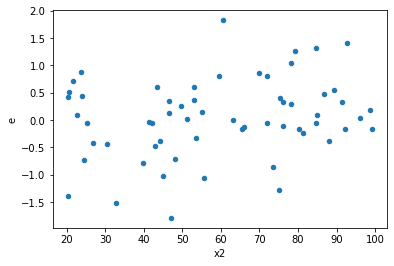

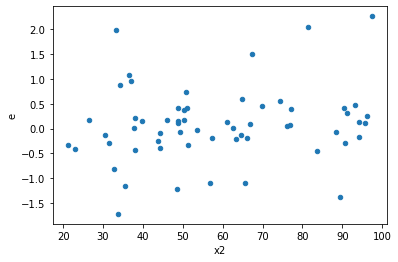

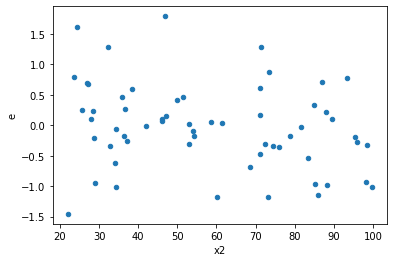

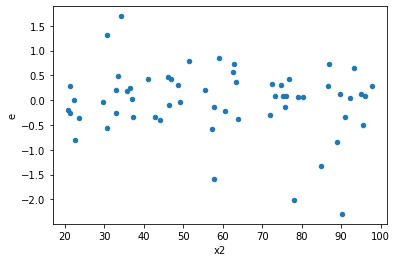

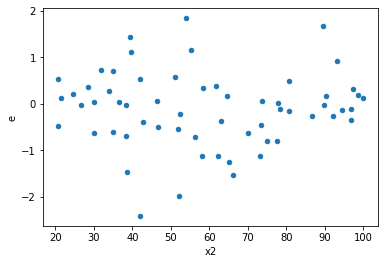

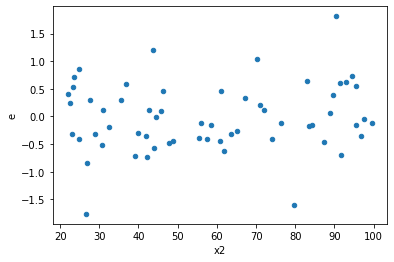

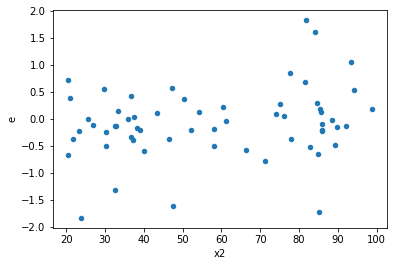

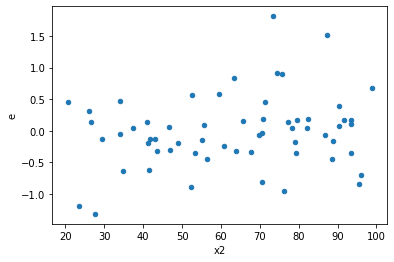

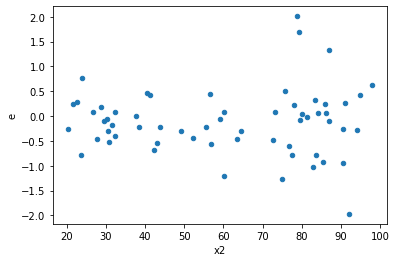

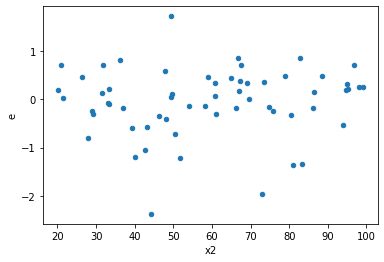

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,21.0,21.0,16.207391897431602,7.670215077061202,0.8103695948715801,0.3835107538530601,2.113029652310789,0.09394079139846134,0.9530296043007693,Reject005=1 : Homoscedasticity
2.0,21.0,21.0,8.348214858456501,7.8266344375342705,0.41741074292282504,0.3913317218767135,1.0666417251355043,0.8838728096607389,0.5580635951696306,Reject005=1 : Homoscedasticity
5.0,21.0,21.0,16.763593105314385,11.891454387717523,0.8381796552657192,0.5945727193858762,1.4097176475426931,0.43797219992791225,0.7810139000360439,Reject005=1 : Homoscedasticity
11.0,21.0,21.0,14.429254044215366,13.78402635564626,0.7214627022107682,0.689201317782313,1.0468098124540226,0.9175060750600919,0.5412469624699541,Reject005=1 : Homoscedasticity
13.0,21.0,21.0,13.109926430541243,6.542253137042581,0.6554963215270622,0.3271126568521291,2.0038855354452965,0.11909846443411443,0.9404507677829428,Reject005=1 : Homoscedasticity
16.0,21.0,21.0,12.478335511243676,6.541563847372201,0.6239167755621838,0.32707819236861,1.9075462385429938,0.14706298987311017,0.9264685050634449,Reject005=1 : Homoscedasticity
17.0,21.0,21.0,7.0805796950928,4.485959534259831,0.35402898475464,0.22429797671299156,1.5783868849055662,0.3034788798945436,0.8482605600527282,Reject005=1 : Homoscedasticity
18.0,21.0,21.0,15.9557517018041,3.130285656825185,0.797787585090205,0.15651428284125926,5.097219056355012,0.00044514803661699354,0.9997774259816915,Reject005=0 : Heteroscedasticity
22.0,21.0,21.0,14.077522267123557,4.7364616723853,0.7038761133561778,0.236823083619265,2.9721600724014863,0.015959721616179756,0.9920201391919101,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,16.207391897431602,7.670215077061202,0.8103695948715801,0.3835107538530601,2.113029652310789,0.09394079139846134,Reject005=1 : Homoscedasticity
1.0,21.0,21.0,6.343583234456206,17.795224663365513,0.3171791617228103,0.8897612331682756,0.35647671521200563,0.022185102279030675,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,8.348214858456501,7.8266344375342705,0.41741074292282504,0.3913317218767135,1.0666417251355043,1.116127190339261,Reject005=1 : Homoscedasticity
3.0,21.0,21.0,11.427898534744594,17.93474900642335,0.5713949267372297,0.8967374503211675,0.6371931121339741,0.30952938268533214,Reject005=1 : Homoscedasticity
4.0,21.0,21.0,9.3979974206063,10.286671303218174,0.469899871030315,0.5143335651609087,0.9136091883937368,0.8379315918758563,Reject005=1 : Homoscedasticity
5.0,21.0,21.0,16.763593105314385,11.891454387717523,0.8381796552657192,0.5945727193858762,1.4097176475426931,0.43797219992791225,Reject005=1 : Homoscedasticity
6.0,21.0,21.0,4.520221095556866,8.82592861613643,0.22601105477784328,0.4412964308068215,0.5121524648740704,0.133247077901367,Reject005=1 : Homoscedasticity
7.0,21.0,21.0,10.16656108725912,12.62033407988817,0.508328054362956,0.6310167039944086,0.8055698860983881,0.6248002033407594,Reject005=1 : Homoscedasticity
8.0,21.0,21.0,14.927477395920803,15.078198518014933,0.7463738697960401,0.7539099259007467,0.9900040364958683,0.9818524713554363,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      870
Reject005=0 : Heteroscedasticity    130
Name: Result_test, dtype: int64